In [52]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer # text feature

# Pre-Processing
from sklearn.preprocessing import StandardScaler # Scaling

# Recommendation System
# basic concept [collaborative, content, hybird]
## correlation + nearest_neighbor with cosine_similarity
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding & Preparing

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings.shape

(100836, 4)

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(9742, 3)

In [7]:
df = pd.merge(movies,ratings,on='movieId',how='inner')
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [9]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [ ]:
# create a data frame contain all movies avd it's average rating and vote count 
movies_count_df = df.groupby(['title','genres']).agg({'userId':len,'rating':np.mean}).reset_index().rename(columns={'userId':'vote_count','rating':'vote_average'})
movies_count_df

,title,genres,vote_count,vote_average
0,'71 (2014),Action|Drama|Thriller|War,1,4.000000
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1,4.000000
2,'Round Midnight (1986),Drama|Musical,2,3.500000
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,1,5.000000
4,'Til There Was You (1997),Drama|Romance,2,4.000000
...,...,...,...,...
9719,eXistenZ (1999),Action|Sci-Fi|Thriller,22,3.863636
9720,xXx (2002),Action|Crime|Thriller,24,2.770833
9721,xXx: State of the Union (2005),Action|Crime|Thriller,5,2.000000
9722,¡Three Amigos! (1986),Comedy|Western,26,3.134615


In [ ]:
# clean genres
movies_count_df['genres'] = movies_count_df['genres'].apply(lambda x: x.replace('|'," "))
movies_count_df

,title,genres,vote_count,vote_average
0,'71 (2014),Action Drama Thriller War,1,4.000000
1,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy,1,4.000000
2,'Round Midnight (1986),Drama Musical,2,3.500000
3,'Salem's Lot (2004),Drama Horror Mystery Thriller,1,5.000000
4,'Til There Was You (1997),Drama Romance,2,4.000000
...,...,...,...,...
9719,eXistenZ (1999),Action Sci-Fi Thriller,22,3.863636
9720,xXx (2002),Action Crime Thriller,24,2.770833
9721,xXx: State of the Union (2005),Action Crime Thriller,5,2.000000
9722,¡Three Amigos! (1986),Comedy Western,26,3.134615


# EDA

In [12]:
px.histogram(movies_count_df['vote_count'])
# threshold ---> vote_count > 20

In [13]:
px.histogram(movies_count_df['vote_average'])

In [14]:
movies_count_df.duplicated().sum()

0

In [15]:
drop_indecies = movies_count_df[movies_count_df['title'].duplicated() == True].index
drop_indecies

Int64Index([1935, 2720, 2783, 7382, 9274], dtype='int64')

In [16]:
movies_count_df.drop(drop_indecies,inplace=True)
movies_count_df.reset_index(drop=True,inplace=True)

In [17]:
movies_count_df.isna().sum().max()

0

# 1) Weighted Rating (Top 20 Movies)

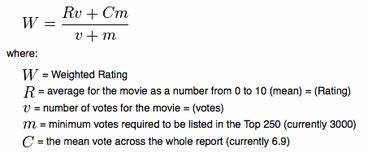

In [18]:
# threshold from univariate analysis
movies_count_df_with_threshold = movies_count_df[movies_count_df['vote_count'] >= 20]
movies_count_df_with_threshold.reset_index(drop=True,inplace=True)

In [19]:
movies_count_df_with_threshold.shape

(1297, 4)

In [20]:
R = movies_count_df_with_threshold['vote_average']
v = movies_count_df_with_threshold['vote_count']
m = movies_count_df_with_threshold['vote_count'].quantile(0.7)
C = movies_count_df_with_threshold['vote_average'].mean()

movies_count_df_with_threshold['weighted_rating'] = (R * v + C * m) / (v + m)
top_20_movies = movies_count_df_with_threshold.sort_values(by='weighted_rating', ascending=False).head(20)
top_20_movies

,title,genres,vote_count,vote_average,weighted_rating
1015,"Shawshank Redemption, The (1994)",Crime Drama,317,4.429022,4.294751
409,Fight Club (1999),Action Crime Drama Thriller,218,4.272936,4.121419
475,"Godfather, The (1972)",Crime Drama,192,4.289062,4.118006
1090,Star Wars: Episode IV - A New Hope (1977),Action Adventure Sci-Fi,251,4.231076,4.103423
909,Pulp Fiction (1994),Comedy Crime Drama Thriller,307,4.197068,4.094330
1219,"Usual Suspects, The (1995)",Crime Mystery Thriller,204,4.237745,4.085511
990,Schindler's List (1993),Drama War,220,4.225000,4.084172
733,"Matrix, The (1999)",Action Sci-Fi Thriller,278,4.192446,4.081524
433,Forrest Gump (1994),Comedy Drama Romance War,329,4.164134,4.071998
1091,Star Wars: Episode V - The Empire Strikes Back...,Action Adventure Sci-Fi,211,4.215640,4.071983


# 2) Content-Base Filtering

In [ ]:
# create data fram with movie index 
title_df = pd.DataFrame(movies_count_df_with_threshold.index,index=movies_count_df_with_threshold['title'])
title_df

,0
title,
(500) Days of Summer (2009),0
10 Things I Hate About You (1999),1
101 Dalmatians (1996),2
101 Dalmatians (One Hundred and One Dalmatians) (1961),3
12 Angry Men (1957),4
...,...
Zoolander (2001),1292
Zootopia (2016),1293
eXistenZ (1999),1294


In [22]:
copy_df = movies_count_df_with_threshold.copy()
copy_df['combined'] = copy_df['title'].apply(lambda x: x[:-7]) + ' ' + copy_df['genres']
copy_df

,title,genres,vote_count,vote_average,weighted_rating,combined
0,(500) Days of Summer (2009),Comedy Drama Romance,42,3.666667,3.583994,(500) Days of Summer Comedy Drama Romance
1,10 Things I Hate About You (1999),Comedy Romance,54,3.527778,3.524288,10 Things I Hate About You Comedy Romance
2,101 Dalmatians (1996),Adventure Children Comedy,47,3.074468,3.315171,101 Dalmatians Adventure Children Comedy
3,101 Dalmatians (One Hundred and One Dalmatians...,Adventure Animation Children,44,3.431818,3.481287,101 Dalmatians (One Hundred and One Dalmatians...
4,12 Angry Men (1957),Drama,57,4.149123,3.840602,12 Angry Men Drama
...,...,...,...,...,...,...
1292,Zoolander (2001),Comedy,54,3.509259,3.515114,Zoolander Comedy
1293,Zootopia (2016),Action Adventure Animation Children Comedy,32,3.890625,3.656867,Zootopia Action Adventure Animation Children C...
1294,eXistenZ (1999),Action Sci-Fi Thriller,22,3.863636,3.618798,eXistenZ Action Sci-Fi Thriller
1295,xXx (2002),Action Crime Thriller,24,2.770833,3.293005,xXx Action Crime Thriller


In [23]:
tf_idf_vectorizer = TfidfVectorizer(lowercase=True,analyzer='word',ngram_range=(1,2),stop_words='english')
tf_idf_matrix = tf_idf_vectorizer.fit_transform(copy_df['combined'])
tf_idf_matrix

<1297x4424 sparse matrix of type '<class 'numpy.float64'>'
	with 11979 stored elements in Compressed Sparse Row format>

In [24]:
def content_base_recommender(movie_name,copy_df,n_movies=10,tf_idf_matrix=tf_idf_matrix,title_df=title_df):
    content_similarity = cosine_similarity(tf_idf_matrix,tf_idf_matrix)
    movie_index = title_df.loc[movie_name]
    similarity_score = list(enumerate(content_similarity[movie_index][0]))
    similarity_score_sorted = sorted(similarity_score,key=lambda x: x[1],reverse=True)
    similarity_sorted_indecies = [e[0] for e in similarity_score_sorted]
    similarity_sorted_values = [e[1] for e in similarity_score_sorted]

    result = copy_df.copy()
    result['similarity'] = 0
    result.iloc[similarity_sorted_indecies,-1] = similarity_sorted_values
    return result.iloc[similarity_sorted_indecies].head(n_movies)

content_base_recommender('Toy Story (1995)',copy_df,20)

,title,genres,vote_count,vote_average,weighted_rating,combined,similarity
1186,Toy Story (1995),Adventure Animation Children Comedy Fantasy,215,3.920930,3.839435,Toy Story Adventure Animation Children Comedy ...,1.000000
1187,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,97,3.860825,3.737812,Toy Story 2 Adventure Animation Children Comed...,1.000000
1188,Toy Story 3 (2010),Adventure Animation Children Comedy Fantasy IMAX,55,4.109091,3.814976,Toy Story 3 Adventure Animation Children Comed...,0.923638
1026,Shrek the Third (2007),Adventure Animation Children Comedy Fantasy,21,3.023810,3.383519,Shrek the Third Adventure Animation Children C...,0.459986
77,Antz (1998),Adventure Animation Children Comedy Fantasy,45,3.244444,3.396474,Antz Adventure Animation Children Comedy Fantasy,0.438770
769,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,132,3.871212,3.768168,"Monsters, Inc. Adventure Animation Children Co...",0.438770
1024,Shrek (2001),Adventure Animation Children Comedy Fantasy Ro...,170,3.867647,3.782877,Shrek Adventure Animation Children Comedy Fant...,0.426982
1217,Up (2009),Adventure Animation Children Drama,105,4.004762,3.838421,Up Adventure Animation Children Drama,0.397148
820,"NeverEnding Story, The (1984)",Adventure Children Fantasy,43,3.581395,3.547423,"NeverEnding Story, The Adventure Children Fantasy",0.374072
1147,The Lego Movie (2014),Action Adventure Animation Children Comedy Fan...,31,3.870968,3.647063,The Lego Movie Action Adventure Animation Chil...,0.361898


In [25]:
def search_movie(val):
    if 'avengers' in val.lower():
        return True
    else:
        return False
    
copy_df[copy_df['title'].apply(search_movie)]

,title,genres,vote_count,vote_average,weighted_rating,combined
95,"Avengers, The (2012)",Action Adventure Sci-Fi IMAX,69,3.869565,3.714898,"Avengers, The Action Adventure Sci-Fi IMAX"
96,Avengers: Age of Ultron (2015),Action Adventure Sci-Fi,27,3.518519,3.520090,Avengers: Age of Ultron Action Adventure Sci-Fi


In [26]:
content_base_recommender('Avengers, The (2012)',copy_df,20)

,title,genres,vote_count,vote_average,weighted_rating,combined,similarity
95,"Avengers, The (2012)",Action Adventure Sci-Fi IMAX,69,3.869565,3.714898,"Avengers, The Action Adventure Sci-Fi IMAX",1.000000
94,Avatar (2009),Action Adventure Sci-Fi IMAX,97,3.603093,3.573338,Avatar Action Adventure Sci-Fi IMAX,0.472313
834,Oblivion (2013),Action Adventure Sci-Fi IMAX,20,3.300000,3.461965,Oblivion Action Adventure Sci-Fi IMAX,0.472313
1068,Spider-Man 2 (2004),Action Adventure Sci-Fi IMAX,79,3.803797,3.687667,Spider-Man 2 Action Adventure Sci-Fi IMAX,0.442227
1076,Star Trek (2009),Action Adventure Sci-Fi IMAX,59,3.864407,3.698661,Star Trek Action Adventure Sci-Fi IMAX,0.436715
1117,Superman Returns (2006),Action Adventure Sci-Fi IMAX,25,3.080000,3.383093,Superman Returns Action Adventure Sci-Fi IMAX,0.402293
96,Avengers: Age of Ultron (2015),Action Adventure Sci-Fi,27,3.518519,3.520090,Avengers: Age of Ultron Action Adventure Sci-Fi,0.377466
1080,Star Trek Into Darkness (2013),Action Adventure Sci-Fi IMAX,27,3.685185,3.574968,Star Trek Into Darkness Action Adventure Sci-F...,0.372286
54,"Amazing Spider-Man, The (2012)",Action Adventure Sci-Fi IMAX,30,3.250000,3.425264,"Amazing Spider-Man, The Action Adventure Sci-F...",0.364931
1144,The Hunger Games: Catching Fire (2013),Action Adventure Sci-Fi IMAX,26,3.634615,3.557375,The Hunger Games: Catching Fire Action Adventu...,0.341504


# 3) Collaborative-Base Filtering

In [27]:
users_count_df = df.groupby('userId')[['rating']].count().reset_index().rename(columns={'rating':'user_rating_count'}).sort_values('user_rating_count',ascending=False)
users_count_df

,userId,user_rating_count
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346
...,...,...
441,442,20
568,569,20
319,320,20
575,576,20


In [28]:
px.histogram(users_count_df['user_rating_count'])
# threshold ---> user_rating_count > 100 (to avoid bias to small active users)

In [29]:
# remove user_rating_count < 100 , movies which have vote_count < 20
users_filter = users_count_df[users_count_df['user_rating_count'] > 100]['userId']
movies_filter = movies_count_df_with_threshold['title']

filterd_df = df[(df['userId'].isin(users_filter)) & (df['title'].isin(movies_filter))]
filterd_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
...,...,...,...,...,...,...
100330,168252,Logan (2017),Action|Sci-Fi,567,4.0,1525283936
100331,168252,Logan (2017),Action|Sci-Fi,586,5.0,1529899336
100332,168252,Logan (2017),Action|Sci-Fi,596,5.0,1535627159
100333,168252,Logan (2017),Action|Sci-Fi,599,3.5,1498529615


In [30]:
user_item_matrix = pd.pivot_table(filterd_df,values='rating',columns='title',index='userId')
user_item_matrix

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,5.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity,index=user_item_matrix.index,columns=user_item_matrix.index)

# Target user
target_user = 10

# Find Similar Users
similar_users = user_similarity_df.iloc[target_user].sort_values(ascending=False)
print(f"Similar users to user {target_user}:\n{similar_users}\n")

Similar users to user 10:
userId
21     1.000000
249    0.559940
534    0.548342
292    0.536143
380    0.530248
         ...   
377    0.058061
571    0.038702
410    0.037884
260    0.037272
74     0.034870
Name: 21, Length: 245, dtype: float64



In [ ]:
# user-user collaborative filtering
def collaborative_based_filtering(target_user,user_item_matrix,top_n_users=2):
    user_similarity = cosine_similarity(user_item_matrix.fillna(0))
    user_similarity_df = pd.DataFrame(user_similarity,index=user_item_matrix.index,columns=user_item_matrix.index)

    # top_n_users include the target user
    similar_users = user_similarity_df.iloc[target_user].sort_values(ascending=False)[:top_n_users]

    movies_scores = {}
    for user,similarity in similar_users.items():
        user_ratings = user_item_matrix.loc[user]

        # Weighted Average rating by users to each movie 
        for movie,rating in user_ratings.items():
            if rating > 0 and pd.isna(user_item_matrix.loc[target_user,movie]): # to check the user doesn't watch the movie
                if movie not in movies_scores:
                    movies_scores[movie] = 0
                movies_scores[movie] += rating * similarity

    # Top Movies Names
    recommended_movie = sorted(movies_scores.items(),key=lambda x: x[1],reverse=True)
    return recommended_movie

# Get recommendations for the target user
recommendations = collaborative_based_filtering(target_user, user_item_matrix,4)
print(f"Recommended movies for user-{target_user}:")
for movie, score in recommendations:
    print(f"{movie} (Score: {score:.2f})")

Recommended movies for user-10:
Back to the Future (1985) (Score: 12.41)
Star Wars: Episode IV - A New Hope (1977) (Score: 11.91)
Star Wars: Episode V - The Empire Strikes Back (1980) (Score: 11.91)
Back to the Future Part II (1989) (Score: 11.85)
Star Wars: Episode VI - Return of the Jedi (1983) (Score: 11.63)
Lion King, The (1994) (Score: 11.41)
Guardians of the Galaxy (2014) (Score: 11.40)
Indiana Jones and the Last Crusade (1989) (Score: 11.40)
Men in Black (a.k.a. MIB) (1997) (Score: 11.36)
Minority Report (2002) (Score: 11.35)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) (Score: 11.14)
Iron Man (2008) (Score: 11.13)
Bourne Identity, The (2002) (Score: 11.12)
Dr. No (1962) (Score: 11.08)
Star Wars: Episode III - Revenge of the Sith (2005) (Score: 11.08)
Back to the Future Part III (1990) (Score: 11.03)
Jurassic Park (1993) (Score: 10.85)
Pirates of the Caribbean: The Curse of the Black Pearl (2003) (Score: 10.85)
Oblivion (2013) (Score: 10.80)
Ind

In [33]:
# check the recommendation is simmilar to his movie
df[df['userId'] == 10].sort_values('rating',ascending=False).head(10)

,movieId,title,genres,userId,rating,timestamp
99259,140110,The Intern (2015),Comedy,10,5.0,1455356776
77147,8869,First Daughter (2004),Comedy|Romance,10,5.0,1455303064
94672,96079,Skyfall (2012),Action|Adventure|Thriller|IMAX,10,5.0,1455302172
93816,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,10,5.0,1455302120
75192,7458,Troy (2004),Action|Adventure|Drama|War,10,5.0,1455356656
92100,81845,"King's Speech, The (2010)",Drama,10,5.0,1455302591
76341,8533,"Notebook, The (2004)",Drama|Romance,10,5.0,1455301847
91318,79091,Despicable Me (2010),Animation|Children|Comedy|Crime,10,5.0,1455306124
90172,71579,"Education, An (2009)",Drama|Romance,10,5.0,1455301869
80014,33794,Batman Begins (2005),Action|Crime|IMAX,10,5.0,1455302031


## Now Let's Build Collaborative Filering types:

* 1) user-user collaborative filtering

* 2) item-item collaborative filtering

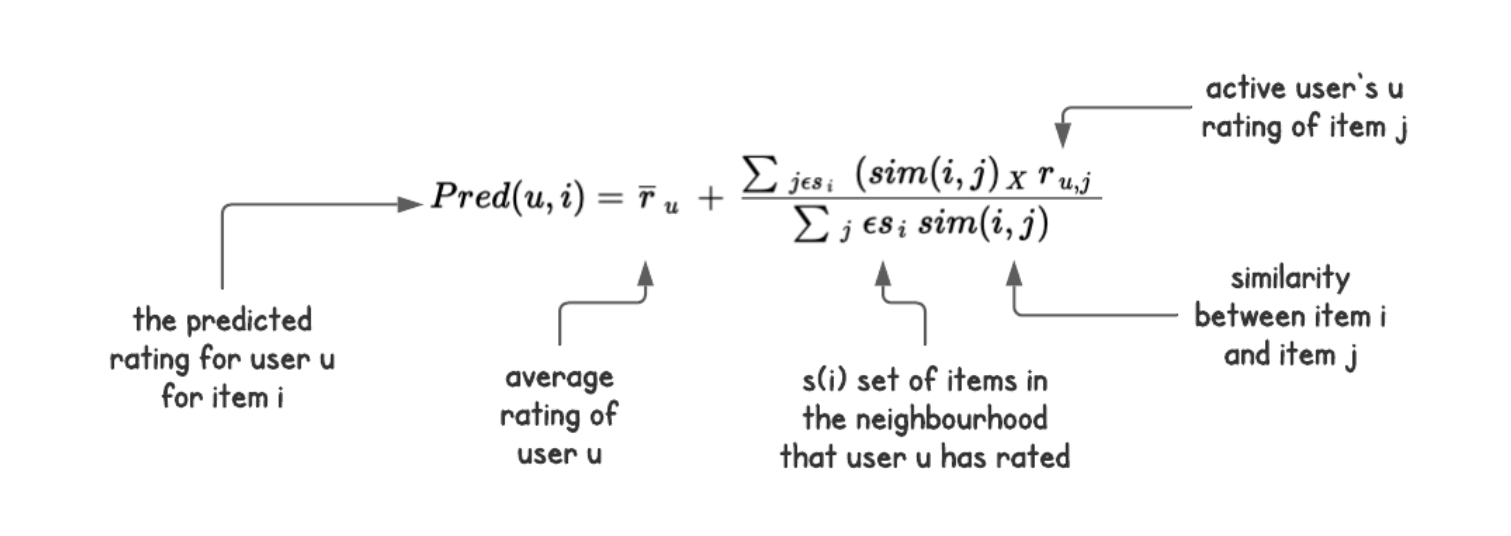

In [34]:
def user_user_collaborative_filtering(user_item_matrix):
    ## Step-1) Normalize user_item_matrix across user
    users_mean = user_item_matrix.mean(axis=1)
    user_item_matrix_norm = user_item_matrix.sub(users_mean, axis=0).fillna(0) # fillnans = 0 after subtracting

    ## Step-2) users_similarities
    # user_similarity = cosine_similarity(user_item_matrix.fillna(0)) # shape = (n_users, n_users)
    user_similarity = cosine_similarity(user_item_matrix_norm) # shape = (n_users, n_users)

    ## Step-3) (Similarity * ratings) / (summation_similarity)
    user_weighted_rating_predictions = user_similarity @ user_item_matrix.fillna(0) # n_users, n_items
    similarity_sum = np.array([np.abs(user_similarity).sum(axis=1)]).T
    user_weighted_rating_predictions = user_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(user_weighted_rating_predictions.values, index=user_item_matrix.index, columns=user_item_matrix.columns)

user_user_collaborative_filtering(user_item_matrix)

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.304797,0.436470,0.289022,0.561574,0.705995,0.147422,0.580586,0.301216,1.458019,0.105241,...,1.544583,0.393266,0.213129,0.483652,0.506978,0.686252,0.213245,0.382798,0.217535,0.749005
4,-0.020146,0.065272,0.173000,0.249202,0.950174,0.011993,-0.069528,0.064213,0.778216,-0.008534,...,0.799456,0.103872,0.029558,0.077242,0.083448,0.078841,0.022149,-0.079476,-0.016291,0.136711
6,-0.044778,0.167353,0.152726,0.257063,0.082845,0.080953,0.015405,-0.012580,-0.150036,-0.001422,...,-0.094300,0.211136,0.056519,-0.125523,-0.009069,0.080222,0.056441,-0.040698,0.103094,0.066190
7,0.373278,0.581661,0.443588,0.630944,0.735138,0.251093,0.238672,0.367766,1.850625,0.196519,...,1.019979,0.308250,0.322650,0.468308,0.710235,0.753114,0.260551,0.256377,0.271292,0.222732
10,-0.355668,-0.327189,-0.123555,-0.132683,-0.500759,-0.120920,-0.219793,-0.242956,-0.876564,-0.163840,...,-0.472910,-0.224259,-0.262898,-0.565953,-0.450236,-0.490113,-0.298739,-0.338991,-0.186116,-0.159440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.273783,0.788541,0.588125,0.442998,0.529746,0.466322,0.143145,0.176763,0.892128,0.134317,...,0.655653,0.214946,0.240839,0.243059,0.514401,0.529983,0.358958,0.081600,0.219274,0.242762
606,0.564934,0.711051,0.446028,0.562566,0.872977,0.259096,0.315731,0.427409,2.094391,0.196060,...,1.307287,0.422829,0.327892,0.681132,0.631770,0.860451,0.239342,0.448047,0.250568,0.363828
607,0.334301,0.180485,0.126633,0.337489,0.535156,0.155589,0.168817,0.257812,0.716096,0.175217,...,0.243578,0.323976,0.177786,0.354448,0.378980,0.439467,0.030853,0.207952,0.237669,0.175384


In [35]:
def item_item_collaborative_filtering(user_item_matrix):
    ## Step-1) Normalize (if needed to include fairness so remove popularity bias)
    item_mean = user_item_matrix.mean(axis=0)
    user_item_matrix_norm = user_item_matrix.sub(item_mean, axis=1).fillna(0)

    ## Step-2) (Similarity * rating) / (summation_of_similarity)
    # item_similarity = cosine_similarity(user_item_matrix.fillna(0).T) # shape: (n_items, n_items)
    item_similarity = cosine_similarity(user_item_matrix_norm.T) # shape: (n_items, n_items)

    ## Step-3) (Similarity * ratings) / (summation_similarity)
    item_weighted_rating_predictions = user_item_matrix.fillna(0).values @ item_similarity # (n_users, n_items) 
    similarity_sum = np.array([np.abs(item_similarity).sum(axis=1)]) # n_items, 1 
    item_weighted_rating_predictions = item_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(item_weighted_rating_predictions, index=user_item_matrix.index, columns=user_item_matrix.columns)
item_item_collaborative_filtering(user_item_matrix)

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.210662,0.234024,0.279156,0.180341,0.339650,0.278555,0.742165,0.367013,0.405799,0.228328,...,0.700422,0.498478,0.136996,0.453001,0.122962,0.180412,0.473597,-0.043410,-0.188835,0.625704
4,0.166481,0.145031,0.095978,0.063304,0.452927,0.177752,0.084280,0.186987,0.306071,0.131795,...,0.349621,0.205423,0.085634,0.268679,0.142273,0.169860,0.205387,0.039551,-0.066577,0.201333
6,0.119863,0.285900,0.276647,0.122026,0.293491,0.279701,0.280188,0.205939,0.005371,0.201595,...,0.227908,0.344081,0.048846,0.240877,0.094637,0.109939,0.173585,0.207647,-0.046530,0.303981
7,0.284492,0.232017,0.080684,0.081176,0.152920,0.235174,0.003261,0.370892,0.218836,0.316319,...,0.192733,0.180143,0.174944,0.353619,0.204424,0.086328,0.372531,0.069191,0.032673,0.132897
10,0.311599,0.258283,0.015485,0.109627,0.159268,0.141083,-0.056291,0.149652,0.040029,0.290971,...,0.134954,0.100883,0.290658,0.231450,0.232162,0.042721,0.268155,0.088625,0.053234,0.061850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.224130,0.279153,0.191317,0.116984,0.152134,0.267436,0.084735,0.160009,0.065354,0.256733,...,0.228658,0.188861,0.213569,0.273957,0.152028,0.157355,0.302298,0.076274,0.018905,0.235548
606,1.021763,0.722955,0.328278,0.155741,0.878567,0.711245,0.588979,1.013200,0.837350,0.780390,...,0.825098,0.898894,0.644950,1.263822,0.666638,0.417591,0.964066,0.281981,0.128898,0.646526
607,0.181444,0.270640,0.092589,0.155779,0.311529,0.288328,0.186577,0.304134,0.190228,0.299238,...,0.274664,0.308056,0.039278,0.320472,0.160611,0.104385,0.321645,0.018547,0.039827,0.243383


In [36]:
def recommend_top_n(predictions, user_item_matrix, user_id, top_n=10):

    # step-1) recommend movie to user_id
    user_predictions = predictions.loc[user_id]

    # step-2) filter out already rated
    rated_items = user_item_matrix.loc[user_id].dropna()

    # step-2) get most rated items from other users
    return user_predictions.drop(rated_items.index).sort_values(ascending=False).head(top_n) # top 10

In [37]:
predictions = user_user_collaborative_filtering(user_item_matrix)
user_id = 10
recommend_top_n(predictions, user_item_matrix, user_id, top_n=10)

title
First Knight (1995)                      0.044191
Flintstones, The (1994)                  0.043145
Milk Money (1994)                        0.020988
Miracle on 34th Street (1994)            0.013448
Mulholland Falls (1996)                  0.006849
Beverly Hillbillies, The (1993)         -0.001102
Muriel's Wedding (1994)                 -0.001166
Strictly Ballroom (1992)                -0.002612
Specialist, The (1994)                  -0.005147
Bridges of Madison County, The (1995)   -0.006180
Name: 10, dtype: float64

In [38]:
predictions = item_item_collaborative_filtering(user_item_matrix)
user_id = 10
recommend_top_n(predictions, user_item_matrix, user_id, top_n=10)

title
Blind Side, The  (2009)                    0.450611
Devil Wears Prada, The (2006)              0.411313
Perks of Being a Wallflower, The (2012)    0.396706
Whiplash (2014)                            0.395574
Slumdog Millionaire (2008)                 0.393936
Avengers, The (2012)                       0.389843
Super Size Me (2004)                       0.389340
Friends with Benefits (2011)               0.372843
Inception (2010)                           0.356559
Behind Enemy Lines (2001)                  0.352787
Name: 10, dtype: float64

In [39]:
user_item_matrix.loc[10][user_item_matrix.loc[10].isna() == False].sort_values(ascending=False).head(10)

title
Notebook, The (2004)             5.0
Dark Knight Rises, The (2012)    5.0
Casino Royale (2006)             5.0
Skyfall (2012)                   5.0
King's Speech, The (2010)        5.0
Intouchables (2011)              5.0
Troy (2004)                      5.0
Batman Begins (2005)             5.0
Holiday, The (2006)              5.0
Despicable Me (2010)             5.0
Name: 10, dtype: float64

## 4) Hybird Filtering of best Recommendation Systems

**will use Content and user_user Collaborative Togther**

In [40]:
filterd_df_formated = filterd_df.groupby(['title', 'genres']).agg({'userId':len, 'rating':np.mean}).rename(columns={'userId':'movie_count', 'rating':'averge_rating'}).reset_index()
filterd_df_formated['genres'] = filterd_df_formated['genres'].apply(lambda x: x.replace('|'," "))
filterd_df_formated

,title,genres,movie_count,averge_rating
0,(500) Days of Summer (2009),Comedy Drama Romance,33,3.484848
1,10 Things I Hate About You (1999),Comedy Romance,42,3.428571
2,101 Dalmatians (1996),Adventure Children Comedy,37,2.878378
3,101 Dalmatians (One Hundred and One Dalmatians...,Adventure Animation Children,35,3.485714
4,12 Angry Men (1957),Drama,43,4.162791
...,...,...,...,...
1294,Zoolander (2001),Comedy,50,3.600000
1295,Zootopia (2016),Action Adventure Animation Children Comedy,24,3.812500
1296,eXistenZ (1999),Action Sci-Fi Thriller,19,3.894737
1297,xXx (2002),Action Crime Thriller,22,2.795455


In [41]:
filterd_df_formated['title'].duplicated().sum()

2

In [42]:
drop_indecies = filterd_df_formated[filterd_df_formated['title'].duplicated() == True].index
drop_indecies

Int64Index([369, 1241], dtype='int64')

In [43]:
filterd_df_formated.drop(drop_indecies,inplace=True)
filterd_df_formated.reset_index(drop=True,inplace=True)

In [44]:
tf_idf = TfidfVectorizer(analyzer='word', lowercase=True, ngram_range=(1, 1), norm='l2', use_idf=True, stop_words='english')
tf_idf_matrix = tf_idf.fit_transform(filterd_df_formated['genres'])
tf_idf_matrix

<1297x21 sparse matrix of type '<class 'numpy.float64'>'
	with 3923 stored elements in Compressed Sparse Row format>

In [45]:
def content_based_filtering(item_features, user_item_matrix):

    # step-1) cosine_similarity
    content_similarity = cosine_similarity(item_features) # n_items, n_items

    # # step-2) calculate weighted_rating
    content_weighted_rating_predictions = user_item_matrix.fillna(0) @ content_similarity
    similarity_sum = np.array([np.abs(content_similarity).sum(axis=1)])
    content_weighted_rating_predictions = content_weighted_rating_predictions / similarity_sum
    return pd.DataFrame(content_weighted_rating_predictions.values, index=user_item_matrix.index, columns=user_item_matrix.columns)
content_based_filtering(tf_idf_matrix, user_item_matrix)

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.399509,0.419233,0.740412,0.911858,0.363237,0.550722,0.917560,0.433451,0.618542,0.582234,...,0.687933,0.692275,0.399509,0.542541,0.589494,0.524634,0.765747,0.662245,0.715294,0.622124
4,0.486915,0.503818,0.388104,0.273228,0.455830,0.480394,0.280772,0.324468,0.285032,0.250859,...,0.463156,0.377053,0.486915,0.388082,0.320413,0.495864,0.320934,0.175974,0.283719,0.499884
6,0.546995,0.580190,0.505003,0.460408,0.485952,0.531660,0.390610,0.442549,0.360530,0.398262,...,0.453943,0.543792,0.546995,0.475062,0.423351,0.500621,0.464579,0.366224,0.452237,0.616647
7,0.230893,0.221341,0.326153,0.448632,0.248459,0.261708,0.459787,0.270304,0.423355,0.391861,...,0.266667,0.277184,0.230893,0.293524,0.288031,0.197876,0.369333,0.444252,0.367250,0.173633
10,0.306053,0.356555,0.234389,0.289545,0.213181,0.330036,0.214996,0.128201,0.146901,0.117984,...,0.220515,0.172704,0.306053,0.152919,0.156386,0.212358,0.236543,0.083205,0.129249,0.177872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.250578,0.308143,0.480439,0.645918,0.144716,0.571151,0.733291,0.169563,0.306563,0.226761,...,0.682017,0.292741,0.250578,0.139430,0.293167,0.273254,0.456737,0.256736,0.203276,0.268253
606,1.637341,1.492027,1.094641,1.118205,1.904572,1.481923,1.138750,1.439584,1.312833,1.194488,...,1.218562,1.006732,1.637341,1.484618,1.011226,1.104187,1.057780,0.935061,1.083857,1.087673
607,0.329027,0.291215,0.324246,0.328065,0.398564,0.306589,0.461850,0.572503,0.428463,0.476158,...,0.293297,0.381084,0.329027,0.473931,0.518465,0.259476,0.360708,0.504507,0.540063,0.269229


In [46]:
def hybird_based_filtering(user_item_matrix, item_features, alpha=0.5):
    # alpha: weight for item_item_colaborative filtering

    item_item_predictions = user_user_collaborative_filtering(user_item_matrix)
    content_predictions = content_based_filtering(item_features, user_item_matrix)
    # their results are below they dont need scaling before addition
    hybird_predictions = alpha * item_item_predictions + (1-alpha) * content_predictions
    return hybird_predictions

In [47]:
hybird_predictions = hybird_based_filtering(user_item_matrix, tf_idf_matrix, alpha=0.7)
recommend_top_n(hybird_predictions, user_item_matrix, 10, 10)

title
First Knight (1995)                                                   0.121728
Milk Money (1994)                                                     0.121658
Strictly Ballroom (1992)                                              0.105138
Bridges of Madison County, The (1995)                                 0.103775
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)    0.100729
Flintstones, The (1994)                                               0.098724
Forget Paris (1995)                                                   0.090638
Sword in the Stone, The (1963)                                        0.074371
Miracle on 34th Street (1994)                                         0.073368
Jungle Book, The (1994)                                               0.071729
Name: 10, dtype: float64

## 5) Machine Learning Models (matrix factorization for collaborative filtering):

* 1) SVD (small dataset)

* 2) NMF (if no values are negative in user_prefrences (rating))

* 3) ALS (larg datasets)

In [ ]:
# 1) SVD (small dataset)

def collaborative_based_filtering_svd(user_item_matrix, n_components=10, max_iter=2000):
    # Step-1: Make SVD Model
    svd_model = TruncatedSVD(n_components=n_components, n_iter=max_iter, random_state=42)

    # Step-2: Decompose the matrix
    user_features = svd_model.fit_transform(user_item_matrix.fillna(0))  # U matrix
    item_features = svd_model.components_  # V matrix

    # Step-3: Reconstruct and evaluate
    reconstructed_matrix = user_features @ item_features
    mse = mean_squared_error(user_item_matrix.fillna(0).values, reconstructed_matrix)
    print(f"Reconstruction Error (MSE): {mse}")
    
    # Return the reconstructed matrix as a DataFrame
    return pd.DataFrame(reconstructed_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

Reconstruction Error (MSE): 1.132662720595976


title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.441225,0.285257,0.471128,0.436255,0.235506,-0.125203,0.350981,-0.120776,1.896018,-0.105366,...,2.507664,1.033870,0.156352,0.039583,0.433633,0.922069,-0.107731,0.239726,-0.335153,1.075000
4,0.244340,1.124124,0.333252,0.253514,0.549455,0.343955,0.198982,-0.169639,1.320747,-0.183078,...,1.331647,0.352195,-0.119949,0.045921,-0.129486,0.185799,-0.011134,0.354041,-0.383143,0.330889
6,0.223812,0.023938,1.023931,0.300276,0.155685,0.319792,0.162721,0.047651,0.218287,0.040164,...,-0.322647,0.377031,-0.036161,0.308812,0.052853,-0.079809,-0.166750,-0.227648,0.108683,0.009707
7,-0.049290,-0.100448,0.200351,0.607619,0.680346,0.160698,-0.105723,0.130512,0.962394,0.056309,...,0.117862,-0.090745,-0.226829,-0.289104,-0.008162,0.053521,0.042008,0.182928,0.452489,-0.135540
10,0.671760,0.645211,0.247151,0.292666,0.356378,0.384643,-0.154299,-0.001365,-0.073877,0.216941,...,-0.226421,-0.101924,0.269431,0.176202,0.594986,0.319423,0.528797,-0.130993,0.162139,-0.104664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.293481,0.405228,0.862473,1.066764,0.396628,0.575494,-0.076940,0.065018,0.261748,0.030371,...,0.668921,-0.024465,-0.017586,-0.277075,0.437963,0.322147,0.294456,-0.198861,0.016534,0.011948
606,1.433742,2.675889,0.621564,0.955914,2.025381,1.038197,0.989740,0.690393,4.200523,0.064539,...,1.128676,0.035785,-0.204548,0.959732,-0.138684,0.251062,0.377808,2.083977,0.853644,-0.229134
607,-0.442083,-0.248405,0.255955,0.339634,0.471909,-0.155116,-0.051973,-0.085733,1.488116,-0.036749,...,1.347089,0.630298,-0.124171,-0.241589,-0.029984,0.101406,-0.154770,-0.009322,-0.007811,0.575118


In [51]:
# Make Recommendations
user_id = 10
svd_predictions = collaborative_based_filtering_svd(user_item_matrix)
recommend_top_n(svd_predictions, user_item_matrix, user_id, top_n=10)

Reconstruction Error (MSE): 1.132662720595976


title
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                                     1.444287
Harry Potter and the Prisoner of Azkaban (2004)                                                   1.378163
Inception (2010)                                                                                  1.371331
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    1.351772
Ocean's Eleven (2001)                                                                             1.341106
Monsters, Inc. (2001)                                                                             1.282321
Harry Potter and the Chamber of Secrets (2002)                                                    1.279882
Good Will Hunting (1997)                                                                          1.269451
Catch Me If You Can (2002)                                                                        1.222265
Titanic (1997)                 

In [53]:
# 2) NMF (if no values are negative in user_prefrences (rating))

def collaborative_based_filtering_nmf(user_item_matrix, n_components=10, max_iter=2000):
    # Step-1: Make NMF Model
    nmf_model = NMF(n_components=n_components, init='random', max_iter=max_iter, random_state=42)

    # Step-2: Decompose the matrix
    user_features = nmf_model.fit_transform(user_item_matrix.fillna(0))  # U matrix
    item_features = nmf_model.components_.T  # V matrix

    # Step-3: Reconstruct and evaluate
    reconstructed_matrix = user_features @ item_features.T
    mse = mean_squared_error(user_item_matrix.fillna(0).values, reconstructed_matrix)
    print(f"Reconstruction Error (MSE): {mse}")
    return pd.DataFrame(reconstructed_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

In [54]:
# Make Recommendations
user_id = 10
nmf_predicitons = collaborative_based_filtering_nmf(user_item_matrix)
recommend_top_n(nmf_predicitons, user_item_matrix, user_id, top_n=10)

Reconstruction Error (MSE): 1.1931329984101464


title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    1.242396
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                                     1.242024
Monsters, Inc. (2001)                                                                             1.186702
Harry Potter and the Prisoner of Azkaban (2004)                                                   1.128977
Inception (2010)                                                                                  1.091555
Back to the Future (1985)                                                                         1.088694
Harry Potter and the Chamber of Secrets (2002)                                                    1.082206
Iron Man (2008)                                                                                   1.066753
Lion King, The (1994)                                                                             1.049914
Avengers, The (2012)           

# Final Notes:

* 1) Top 10 Recommendation: Use for main page in web (by weighted_average_with_popularity)

* 2) If user clicked on movie show similar top 10 movies: (by Content Based Filtering)

* 3) If user clicked many times on items and rated them (external or internaly by length of watched movies) more than 10 ratings then use Hybird Colaborative Filtering (by: user_user(at this dataset) + Content with large weight for user_user)